## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("data_cleaned.csv")

In [3]:
df.shape

(10663, 20)

In [4]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [5]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [6]:
# Completeness
df.isnull().sum()

Unnamed: 0             0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [7]:
# Accurecy types
df.dtypes

Unnamed: 0               int64
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [8]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding

numeric_features = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

categorical_features = ['name','team', 'position']

In [9]:
for i in categorical_features:
    print(df[i].value_counts())

Paulinho              6
Vitinho               5
Guilherme             5
João Pedro            4
Pedrinho              4
                     ..
Luis Henrique         1
Diego Hernández       1
Victor Sá             1
Gustavo Sauer         1
Alexander Badolato    1
Name: name, Length: 10496, dtype: int64
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
Swansea City              22
CA Independiente          22
Newcastle United Jets     21
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64
Defender Centre-Back          1817
Attack Centre-Forward         1344
Goalkeeper                    1209
midfield-CentralMidfield      1141
midfield-DefensiveMidfield     899
Defender Right-Back            863
Defender Left-Back             805
midfield-AttackingMidfield     751
Attack-RightWinger             710
Attack-LeftWinger       

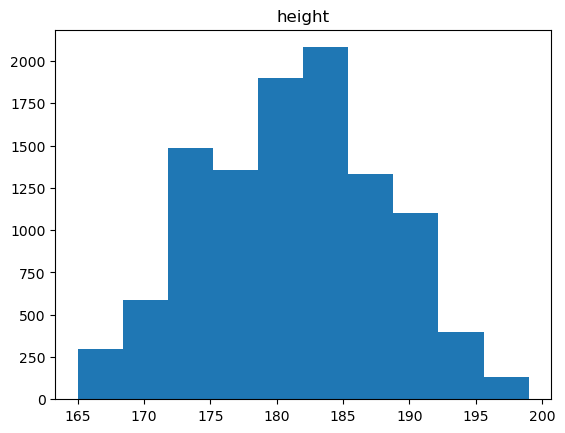

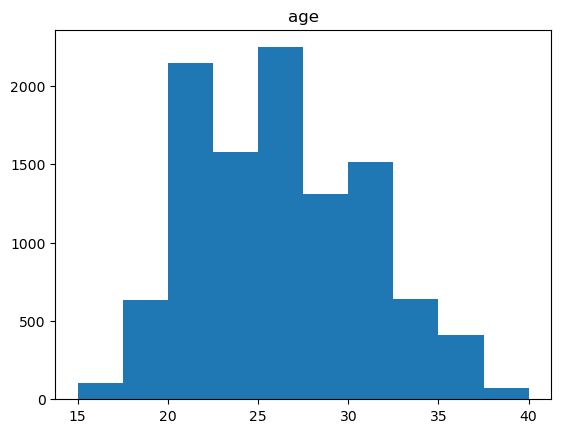

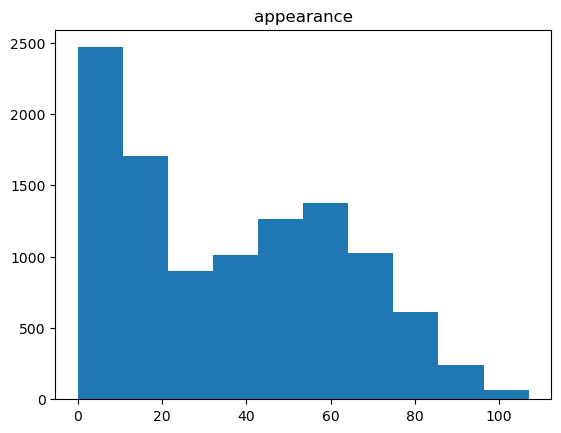

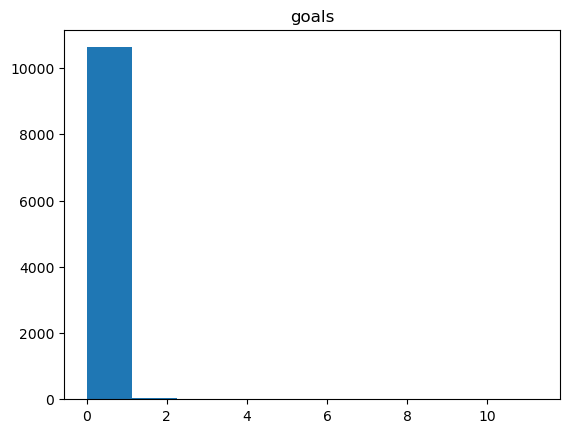

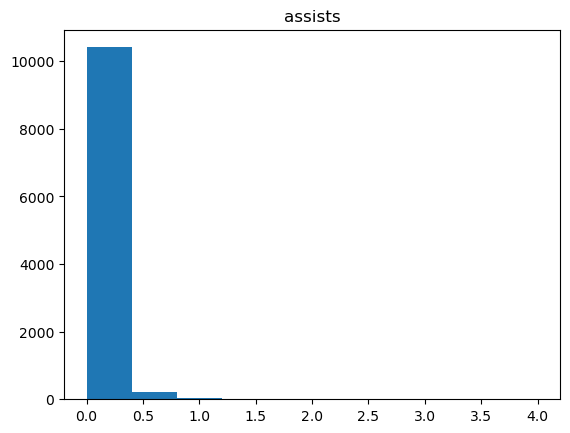

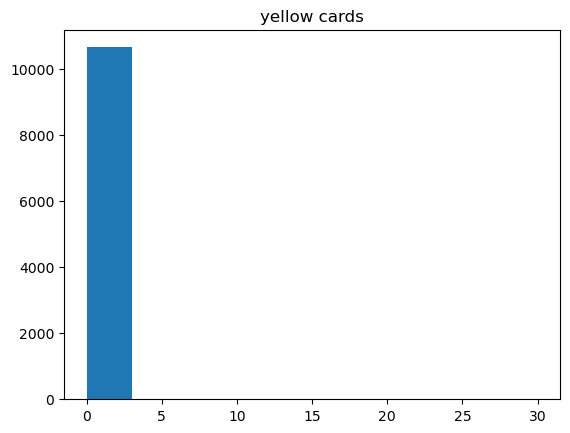

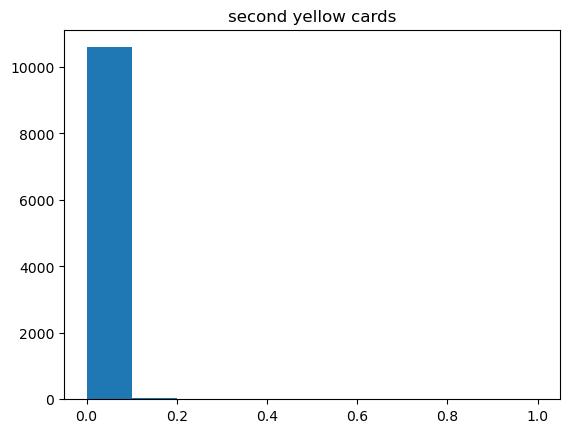

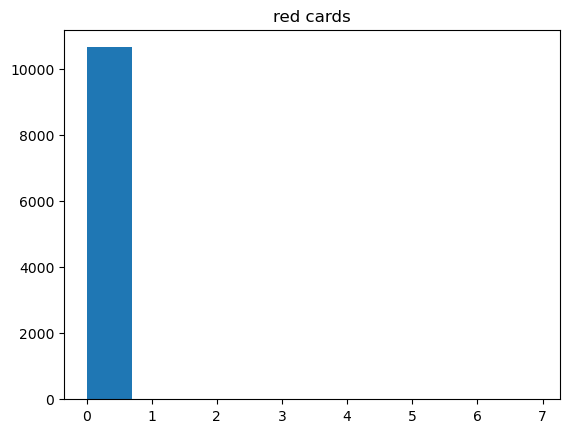

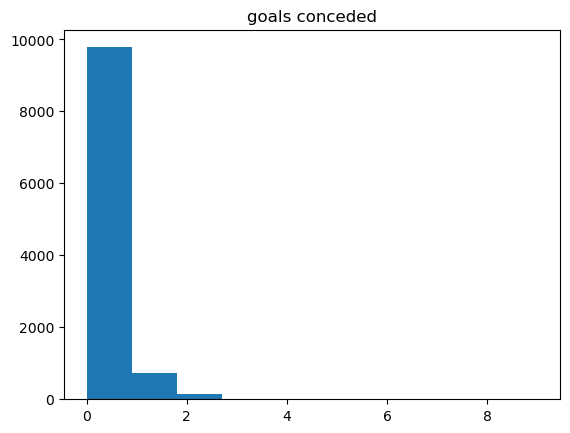

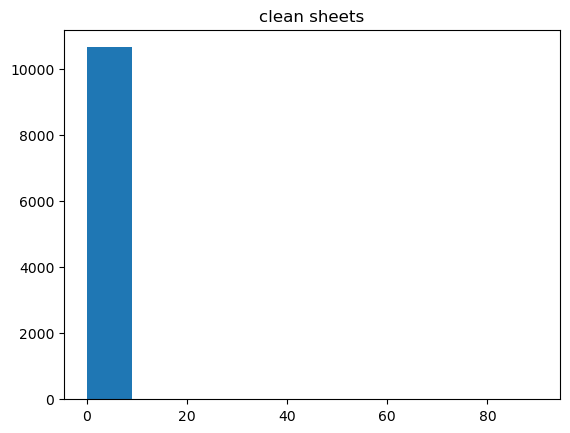

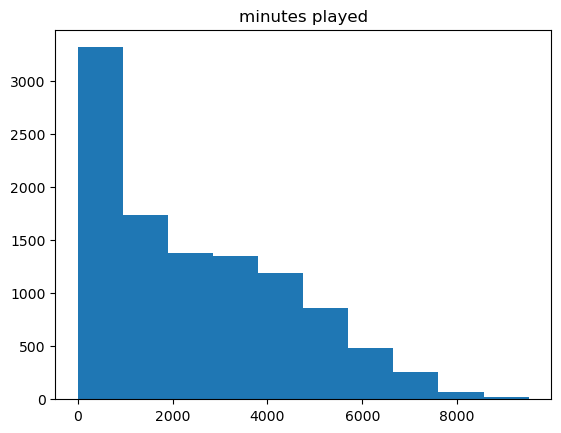

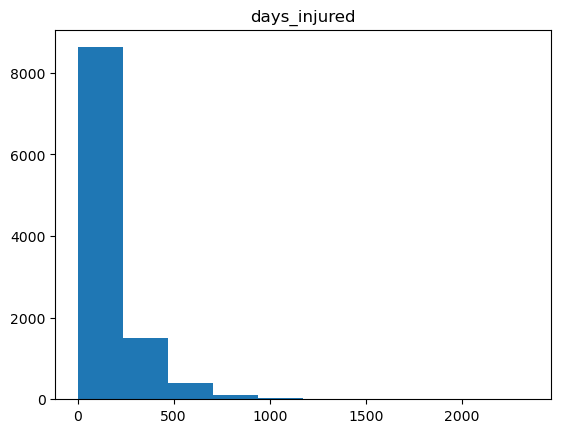

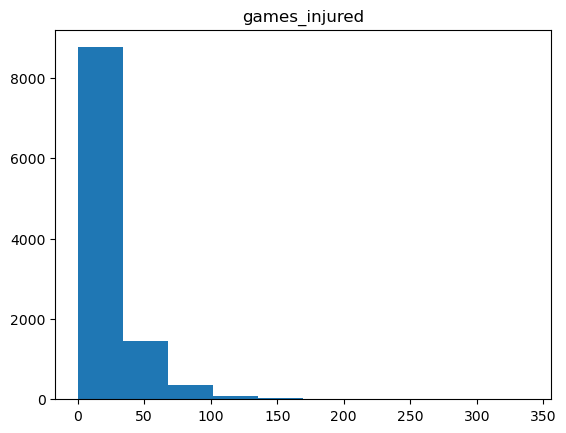

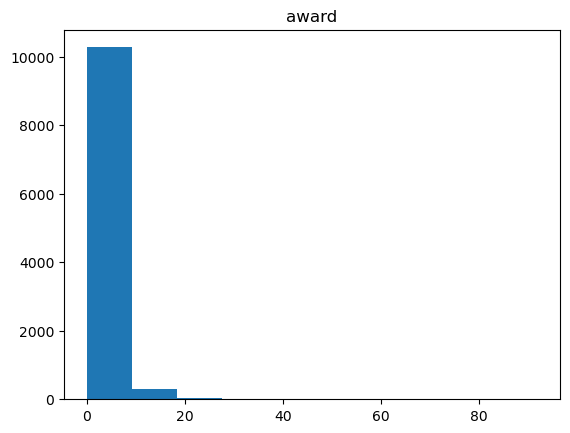

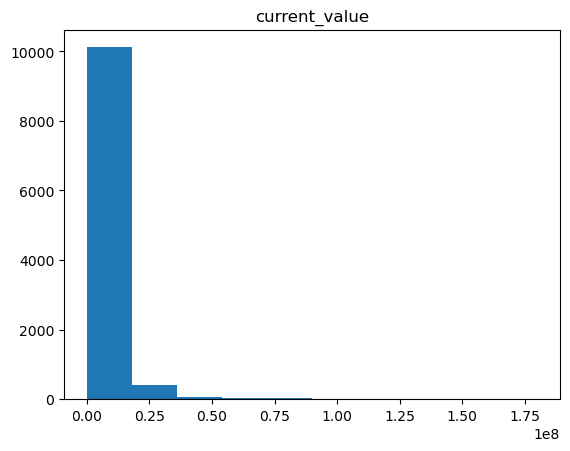

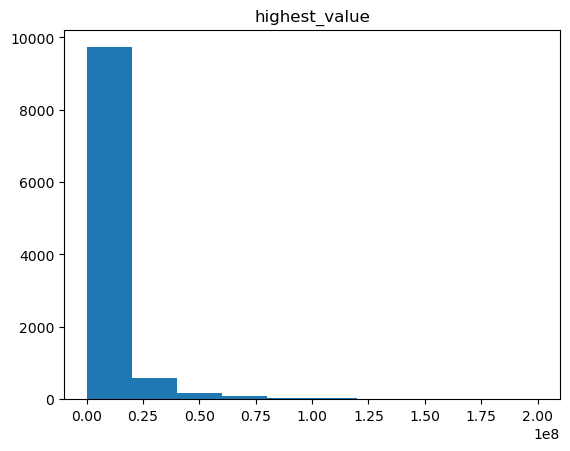

In [10]:
for i in numeric_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [11]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


In [12]:
categorical_features

['name', 'team', 'position']

In [13]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [14]:
df.shape

(10663, 10903)

In [15]:
df.head(2)

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,...,0,0,0,1,0,0,0,0,0,0
1,1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,...,0,0,0,1,0,0,0,0,0,0


In [16]:
df.describe()

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
count,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000,...,10663.000000,10663.000000,10663.000000,10663.000000,10663.00000,10663.000000,10663.000000,10663.000000,10663.000000,10663.000000
mean,5369.065929,181.295766,26.020691,36.467598,0.125394,0.086974,0.190097,0.004672,0.006844,0.130804,...,0.170402,0.075495,0.080934,0.113383,0.00694,0.070430,0.107006,0.084310,0.009191,0.009472
std,3102.634231,6.795169,4.748500,26.535742,0.232991,0.143606,0.433324,0.025267,0.081474,0.441598,...,0.376003,0.264200,0.272747,0.317075,0.08302,0.255883,0.309135,0.277866,0.095431,0.096867
min,0.000000,165.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2682.500000,176.000000,22.000000,12.000000,0.000000,0.000000,0.053957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5366.000000,181.240353,26.000000,35.000000,0.046217,0.041077,0.150558,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8051.500000,186.000000,29.000000,59.000000,0.172386,0.132939,0.248643,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10753.000000,199.000000,40.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3. Feature selection

In [17]:
# sns.heatmap(df.corr(), annot=True);

In [18]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

In [ ]:
# Set the correlation threshold
threshold = 0.20  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

In [ ]:
selected_features = ['age', 'appearance', 'goals', 'assists', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'team_AC Milan', 'team_Arsenal FC', 'team_Aston Villa',
       'team_Atalanta BC', 'team_Atlético de Madrid', 'team_Borussia Dortmund',
       'team_Brentford FC', 'team_Brighton &amp; Hove Albion',
       'team_Chelsea FC', 'team_Everton FC', 'team_Leeds United',
       'team_Leicester City', 'team_Newcastle United', 'team_SSC Napoli',
       'team_Southampton FC', 'team_Tottenham Hotspur',
       'team_Wolverhampton Wanderers']

In [ ]:
df = df[selected_features]
df.head()

#### 4. Prepare train and test data

In [ ]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.shape

## Buliding the Model

In [ ]:
model = LinearRegression()

## Train the Model

In [ ]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

## Test the Model

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [ ]:
model.coef_

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
print(model.intercept_) 

In [ ]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
print(model.intercept_) 

In [ ]:
param_grid ={
    'alpha': [0.001, 0.01, 1, 11, 22, 33, 44]
}
lasso_model = GridSearchCV(Lasso(), param_grid)


In [ ]:
ridge_model = GridSearchCV(Ridge(), param_grid)

In [ ]:
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

In [ ]:
coeff_df = pd.DataFrame(lasso_model.best_estimator_.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
y_test =lasso_model.predict(X_test_scaled)

## Evaluating the Model 

1. Mean Square Error

In [ ]:
y_base = [y_train.mean()] * len(y_test)

In [ ]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

In [ ]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

2. Mean Absolute Error

In [ ]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

In [ ]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

3. Root Mean Squared Error

In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

In [ ]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

4. R Square

In [ ]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

#### Predictions vs. Real Values

In [ ]:
predictions = model.predict(X_test_scaled)
#predictions

In [ ]:
Real_Values = np.array(y_test)
#Real_Values

In [ ]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

In [ ]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution